# <span style="color:Blue">Assignment-4 of COSC5806: Data Analysis with Python</span>

## <span style="color:Purple">You are allowed to use core Python's built in modules/packages/libraries, NumPy, and Pandas. Not allowed to use any other libraries including scikit-learn, matplotlib, and Seaborn. Please read the instruction carefully and do not hesitate to contact me if you have any questions.</span>

### <span style="color:Red">Examples and Resources for this assignment:</span>
<ul>
    <li><span style="color:Red">Chapters 3, 4, 5, 6, 7, 8, and 9 from <a href="https://docs.python.org/3/tutorial/index.html">The Python Tutorial</a></span></li>
    <li><span style="color:Red">Chapter 2 from <a href="https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html">Introduction to NumPy</a></span></li>
    <li><span style="color:Red">Chapter 3 from <a href="https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html">Data Manipulation with Pandas</a></span></li>
    <li><span style="color:Red">Chapter 2 from <a href="https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb">End to End Machine Learning Project</a></span></li>
    <li><span style="color:Red">Chapter 4 from <a href="https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb">Training Linear Models</a></span></li>
</ul>

### <span style="color:Green">Context</span>
The attached CSV file contains daily weather data for the year 2024 for the city of Sault Ste. Marie, Ontario, Canada. It includes key meteorological variables such as:

<ul>
    <li><span><b>Date:</b> The recorded date of the weather data.</span></li>
    <li><span><b>Mean Temp ($^{\circ}$C):</b> The average daily temperature in degrees Celsius.</span></li>
    <li><span><b>Total Precip (mm):</b> The total daily precipitation (rain and melted snow) in millimeters.</span></li>
    <li><span><b>Snowfall (cm):</b> The amount of snowfall in centimeters.</span></li>
    <li><span><b>Wind Speed (km/h):</b> The recorded daily wind speed in kilometers per hour.</span></li>
</ul>

The following <a href="https://climate.weather.gc.ca/glossary_e.html">link</a> might be useful for the description of the features. With this dataset predict the mean temperature of a day.

# <span style="color:Green">P1: Load the dataset.</span>

In [39]:
#Codes of P1 here
#load require modules
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#read the data from csv file
weather = pd.read_csv(r'D:\Algoma\COSC5806001_DataAnalysis\out.csv')
#get dataframe
df = pd.DataFrame(weather)

# <span style="color:Green">P2: Print a quick description of the data.</span>

In [41]:
#Codes of P2 here
# info about columns in the dataset and some description
print(df.info())
print(weather.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              1827 non-null   float64
 1   Latitude (y)               1827 non-null   float64
 2   Station Name               1827 non-null   object 
 3   Climate ID                 1827 non-null   int64  
 4   Date/Time                  1827 non-null   object 
 5   Year                       1827 non-null   int64  
 6   Month                      1827 non-null   int64  
 7   Day                        1827 non-null   int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              1789 non-null   float64
 10  Max Temp Flag              38 non-null     object 
 11  Min Temp (°C)              1789 non-null   float64
 12  Min Temp Flag              38 non-null     object 
 13  Mean Temp (°C)             1789 non-null   float

# <span style="color:Green">P3: Display a summary of the numerical attributes.</span>

In [43]:
#Codes of P3 here
# extract float64 data as all numerical attributes columns are float. int type are id and date values
numerical = weather.select_dtypes("float64")
#remove columns that have all null (NaN) values
numerical = numerical.dropna(axis=1, how="all") 

print(numerical.info())
print(numerical.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              1827 non-null   float64
 1   Latitude (y)               1827 non-null   float64
 2   Max Temp (°C)              1789 non-null   float64
 3   Min Temp (°C)              1789 non-null   float64
 4   Mean Temp (°C)             1789 non-null   float64
 5   Heat Deg Days (°C)         1789 non-null   float64
 6   Cool Deg Days (°C)         1789 non-null   float64
 7   Total Rain (mm)            1803 non-null   float64
 8   Total Snow (cm)            1803 non-null   float64
 9   Total Precip (mm)          1821 non-null   float64
 10  Snow on Grnd (cm)          828 non-null    float64
 11  Dir of Max Gust (10s deg)  1311 non-null   float64
 12  Spd of Max Gust (km/h)     1311 non-null   float64
dtypes: float64(13)
memory usage: 185.7 KB
None
     

# <span style="color:Green">P4: Plot a histogram for each numerical attribute.</span>

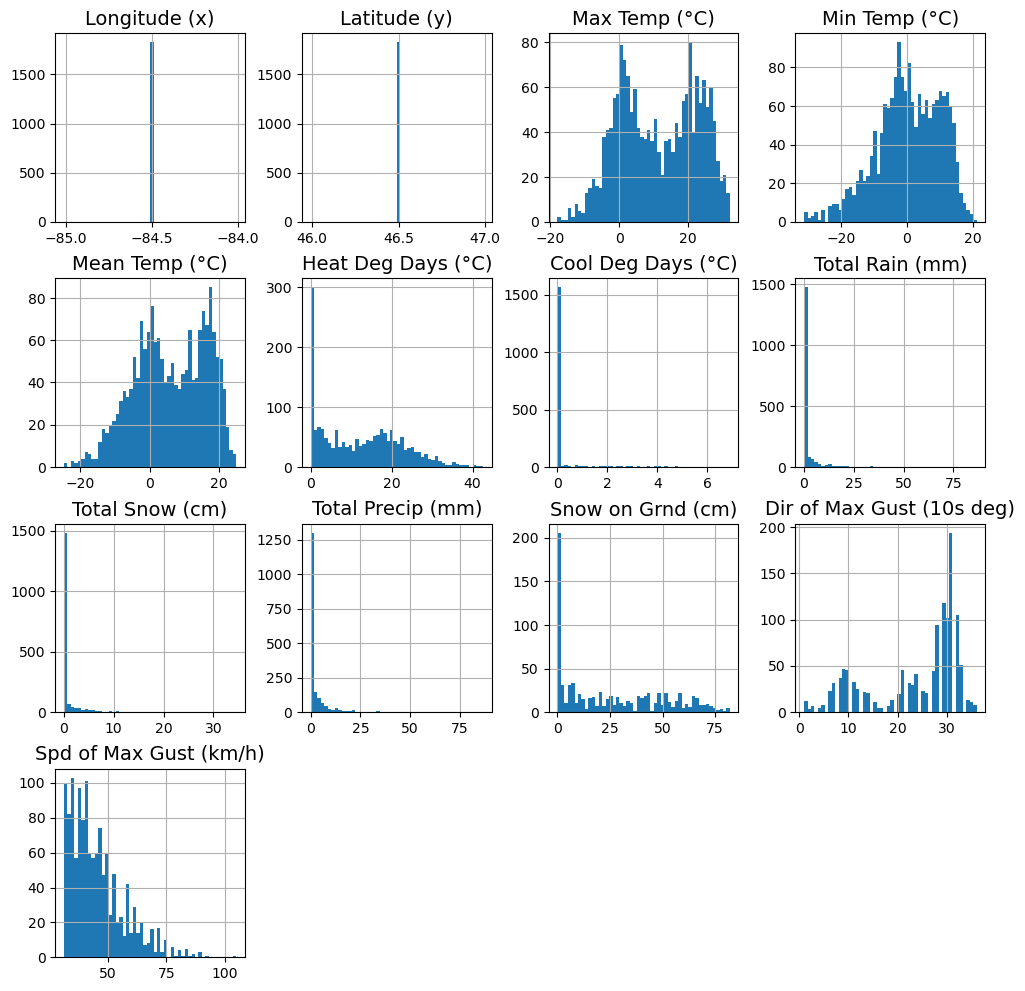

In [45]:
#Codes of P4 here
#setting some properties of plot 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
numerical.hist(bins=50, figsize=(12, 12))
plt.show()


# <span style="color:Green">P5: Compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes.</span>

In [47]:
#Codes of P5 here
# get correlation of only numeric columns
correlation = numerical.corr(numeric_only= True)
correlation['Mean Temp (°C)'].sort_values(ascending=False)

Mean Temp (°C)               1.000000
Max Temp (°C)                0.975783
Min Temp (°C)                0.967516
Cool Deg Days (°C)           0.465418
Total Rain (mm)              0.204095
Total Precip (mm)            0.080768
Dir of Max Gust (10s deg)   -0.001776
Spd of Max Gust (km/h)      -0.232029
Total Snow (cm)             -0.334322
Snow on Grnd (cm)           -0.569734
Heat Deg Days (°C)          -0.996413
Longitude (x)                     NaN
Latitude (y)                      NaN
Name: Mean Temp (°C), dtype: float64

# <span style="color:Green">P6: Set the missing values to the median (if any).</span>

In [51]:
#Codes of P6 here
# check if there is missing values
print("""Check sum of missing values
-----------------------------------------------------""")
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=[np.number]).columns
# Replace missing values with median for numeric columns
df_copy = df.copy()
for column in numeric_columns:
    median = df_copy[column].median()
    df_copy[column] = df_copy[column].fillna(median)
print("""-----------------------------------------------------
Check after setting missing values to the median of each numeric column 
-----------------------------------------------------""")
print(df_copy.isnull().sum())


Check sum of missing values
-----------------------------------------------------
Longitude (x)                   0
Latitude (y)                    0
Station Name                    0
Climate ID                      0
Date/Time                       0
Year                            0
Month                           0
Day                             0
Data Quality                 1827
Max Temp (°C)                  38
Max Temp Flag                1789
Min Temp (°C)                  38
Min Temp Flag                1789
Mean Temp (°C)                 38
Mean Temp Flag               1789
Heat Deg Days (°C)             38
Heat Deg Days Flag           1789
Cool Deg Days (°C)             38
Cool Deg Days Flag           1789
Total Rain (mm)                24
Total Rain Flag              1656
Total Snow (cm)                24
Total Snow Flag              1628
Total Precip (mm)               6
Total Precip Flag            1512
Snow on Grnd (cm)             999
Snow on Grnd Flag            1665


# <span style="color:Green">P7: Split your dataset into training set (80%) and test set (20%).</span>

In [53]:
#Codes of P7 here
#check the year values column 
unique_year = df['Year'].unique()
print("Year values in the dataset",unique_year)

# Calculate the split index for 80%-20%
split_idx = int(len(unique_year) * 0.8)
# Split into training and testing sets
train_set_years = unique_year[:split_idx]  # First 80% as training set
test_set_years = unique_year[split_idx:]   # Last 20% as testing set

# take dataframe for training set 80% and testing set 20%
train_df = df[df['Year'].isin(train_set_years)]  # get Years for training
test_df =df[df['Year'].isin(test_set_years)]  # get Year  for testing

print(f"Take {train_set_years} years as training set and {test_set_years} years as testing set")
print(f"Training set ~80% info",train_df.shape)
print(f"Testing set ~20% info",test_df.shape)


Year values in the dataset [2020 2021 2022 2023 2024]
Take [2020 2021 2022 2023] years as training set and [2024] years as testing set
Training set ~80% info (1461, 31)
Testing set ~20% info (366, 31)


# <span style="color:Green">P8: Use LinearRegression, DecisionTreeRegressor, and RandomForestRegressor to train your model. (apply 5-fold cross validation). For each regression model calculate and print RMSE score. </span>

In [61]:
#Codes of P8 here
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}
# setting features col list and target col list for training models
features = ['Max Temp (°C)', 'Min Temp (°C)','Total Rain (mm)', 'Total Snow (cm)','Total Precip (mm)', 'Spd of Max Gust (km/h)']
target = 'Mean Temp (°C)'

# extract data from training set with features and target
X_train = train_df[features]
y_train = train_df[target]

# set missing values with median
X_train = X_train.fillna(X_train.median())
y_train = y_train.fillna(y_train.median())

# Function for each model to calculate RMSE score with cross-validation 5-fold 
def calculate_rmse_scores(model):
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse_scores

# Evaluate each model
for name, model in models.items():
    rmse_scores = calculate_rmse_scores(model)
    print(f"{name}")
    print(f"RMSE Scores: {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean():.3f}")
    print('--------------------------------------')

Linear Regression
RMSE Scores: [0.03217412 0.04276284 0.05002179 0.04500591 0.03425509]
Mean RMSE: 0.041
--------------------------------------
Decision Tree Regressor
RMSE Scores: [0.49962443 0.49038704 0.71958892 0.43706681 0.46684602]
Mean RMSE: 0.523
--------------------------------------
Random Forest Regressor
RMSE Scores: [0.26778742 0.31190676 0.57634402 0.24814956 0.21243906]
Mean RMSE: 0.323
--------------------------------------


# <span style="color:Green">P9: Calculate and print RMSE score for the test set. </span>

In [65]:
#Codes of P9 here
# reuse some code of P8 here for training set
# extract data from testing set with features and target
X_test = test_df[features]
y_test = test_df[target]

# set missing values with median
X_test = X_test.fillna(X_test.median())
y_test = y_test.fillna(y_test.median())


# Function for each model to train, predict and print RMSE score for testing set
def calculate_testing_rmse_scores(model):
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predict on test set (2024 data)
    test_predictions = model.predict(X_test)
    test_rmse_scores = np.sqrt(mean_squared_error(y_test, test_predictions))
    
    return test_rmse_scores
    
print('Test Set RMSE Scores ')
print('----------------------')
# Evaluate each model
for name, model in models.items():
    testing_rmse_scores = calculate_testing_rmse_scores(model)    
    print(f" {name}: {testing_rmse_scores:.3f}")


Test Set RMSE Scores 
----------------------
 Linear Regression: 0.029
 Decision Tree Regressor: 0.391
 Random Forest Regressor: 0.208


# <span style="color:Green">P10: Predict the mean temperature of a date and compare it with the actual mean temperature.</span>

In [67]:
#Codes of P10 here
#select one date from test set
date_selected = '2024-11-06'
# get data of that date
selected_data =  test_df[test_df['Date/Time'] == date_selected]
#print(test_df['Date/Time'].values[0])

# get features and target(mean temp) for selected date
X_selected_date = selected_data[features]
actual_temp_selected_date = selected_data[target].values[0]

# Function for each model to predict for selected date
def predict_mean_temp(model):
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predict on selected date
    predict_temp = model.predict(X_selected_date)[0]
    return predict_temp


print(f"Actual Mean Temperature on {date_selected} : {actual_temp_selected_date}°C")
# Evaluate each model
for name, model in models.items():
    predicted_value = predict_mean_temp(model)    
    print(f"Prediction of {name}: {predicted_value:.2f}°C")


Actual Mean Temperature on 2024-11-06 : 7.1°C
Prediction of Linear Regression: 7.12°C
Prediction of Decision Tree Regressor: 7.50°C
Prediction of Random Forest Regressor: 7.16°C
